In [1]:
# imports 
import pdb
import matplotlib.pyplot as plt
import numpy as np
import time
import inspect, os, sys
from graph1 import create_clauses, assess_number_of_unknowns, get_primes_lower_than_n

In [8]:
threshold = 1e5
primes = get_primes_lower_than_n(int(np.sqrt(threshold)))
primes = primes[1:] # excluding number 2

In [9]:
qubits_required_no_preprocessing = []
qubits_required_with_preprocessing = []
initial_time = time.time()

In [10]:
file_name = "preprocessing_5rules_results.csv"
plot_name = "reprocessing_5rules_plot.png"

In [ ]:
for p in primes:
        for q in primes:
            if p < q:
                continue
            m = p * q
            if m > threshold:
                continue
            start_time = time.time()

            p_dict, q_dict, z_dict, _ = create_clauses(m, p, q, apply_preprocessing=True, verbose=False)
            x, z = assess_number_of_unknowns(p_dict, q_dict, z_dict)
            qubits_required_with_preprocessing.append([m, x, z])

            end_time = time.time()
            t = np.round(end_time - start_time, 3)
            #print(p, q, m, x, z, t, "    ")#, end="\r")

        np.savetxt(file_name, np.array(qubits_required_with_preprocessing), delimiter=",", fmt='%.d', header='m,unknowns,carry_bits', comments='')

In [ ]:
qubits_required_no_preprocessing = np.genfromtxt('no_preprocessing.csv', skip_header=1, delimiter=',')
qubits_required_with_preprocessing = np.genfromtxt('preprocessing_5rules_results.csv', skip_header=1, delimiter=',')
print("Total time:", np.round((end_time - initial_time) / 60, 3), '[min]')

data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

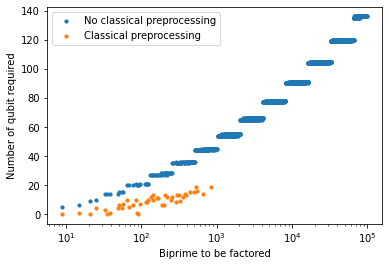

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)
ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()